# MODERN PORTFOLIO THEORY & CAPITAL ASSET PRICING MODEL
This is a notebook implementing modern portfolio theory (with leverage; allowing for shortage of assets) in order to compute the efficient frontier. We then extend this efficient portfolio model with the addition of a risk-free asset (e.g: T-bill). Finally, we suggest the introduction of eigevalues to our model in order to reduce the noise in our correlation matrix (i.e: Sigma matrix), which is specially relevant (as per argumented by Random Matrix Theory) for larges N where N is the amount of assets in our portfolio.

We have created a small library to showcase the results of our research. This library is downloable in PyPy. Just do pip install ****

Produced by Javier D. Segura. Reach out.

## 0) Set-up

In [1]:
import random

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from library.main import Portfolio # Loading our own library

In [3]:
portfolio = Portfolio() 

In [4]:
sp500 = portfolio.extract_tickers()
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


We will extract 15 tickers (assets/securities) for our portfolio. The seleected amount of tickers is not arbitrary. It follows the standard amount of assets in a portfolio. For the sake of this exercise we select 15 assets randomly from the sp500. We have to make sure that the daily measurements fit the normal distribution that we expect for the CER model assumption.

In [5]:
number_of_assets = 17
list_of_tickers = random.sample(sp500["Symbol"].tolist(), number_of_assets)
list_of_tickers

['UHS',
 'AME',
 'ATO',
 'MA',
 'LVS',
 'KVUE',
 'WAT',
 'EG',
 'PFE',
 'SPG',
 'WRB',
 'PARA',
 'NRG',
 'RVTY',
 'BAC',
 'EOG',
 'OXY']

The timeline we are measuring has to be extensive enough in order to provide representative data that is generalizable. We set 2019 as the upper bound for our timeline. This is due to the statistical noise data from 2020-2021 introduce (due to the global Covid pandemic).

In [6]:
start_date = "2000-01-01"
end_date = "2019-12-31"

We then proceed to install from yahoo finance's API the chosen data.

In [7]:
portfolio.update_tickers(list_of_tickers, start_date, end_date)

=> Downloading data for AME from 2000-01-01 to 2019-12-31
=> Downloading data for ATO from 2000-01-01 to 2019-12-31
=> Downloading data for UHS from 2000-01-01 to 2019-12-31
=> Downloading data for MA from 2000-01-01 to 2019-12-31


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=> Downloading data for LVS from 2000-01-01 to 2019-12-31
=> Downloading data for KVUE from 2000-01-01 to 2019-12-31
=> Downloading data for WAT from 2000-01-01 to 2019-12-31
=> Downloading data for EG from 2000-01-01 to 2019-12-31


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=> Downloading data for PFE from 2000-01-01 to 2019-12-31
=> Downloading data for SPG from 2000-01-01 to 2019-12-31


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=> Downloading data for WRB from 2000-01-01 to 2019-12-31
=> Downloading data for PARA from 2000-01-01 to 2019-12-31
=> Downloading data for NRG from 2000-01-01 to 2019-12-31


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=> Downloading data for RVTY from 2000-01-01 to 2019-12-31
=> Downloading data for BAC from 2000-01-01 to 2019-12-31
=> Downloading data for EOG from 2000-01-01 to 2019-12-31


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=> Downloading data for OXY from 2000-01-01 to 2019-12-31


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['KVUE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2019-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 946702800, endDate = 1577768400")')


Error processing KVUE: No data for KVUE in 2000-01-01–2019-12-31


As implied earlier on, we need to make sure that the data approximately fits a normal distribution (in accordance with the CER model --constant expected return). We do so by making sure that the shape is similar, for that, we need to plot each asset distribution. 

/Users/javierdominguezsegura/Academics/College/Courses/2nd year/Lin Algebra/library/plots/plots.py:192: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean = float(info['metrics'].loc["mean"])
/Users/javierdominguezsegura/Academics/College/Courses/2nd year/Lin Algebra/library/plots/plots.py:193: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  std = float(info['metrics'].loc["std"])
/Users/javierdominguezsegura/Academics/College/Courses/2nd year/Lin Algebra/library/plots/plots.py:194: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  min = float(info['metrics'].loc["min"])
/Users/javierdominguezsegura/Academics/College/Courses/2nd year/Lin Algebra/library/plots/plots.py:195: FutureWarning: Calling floa

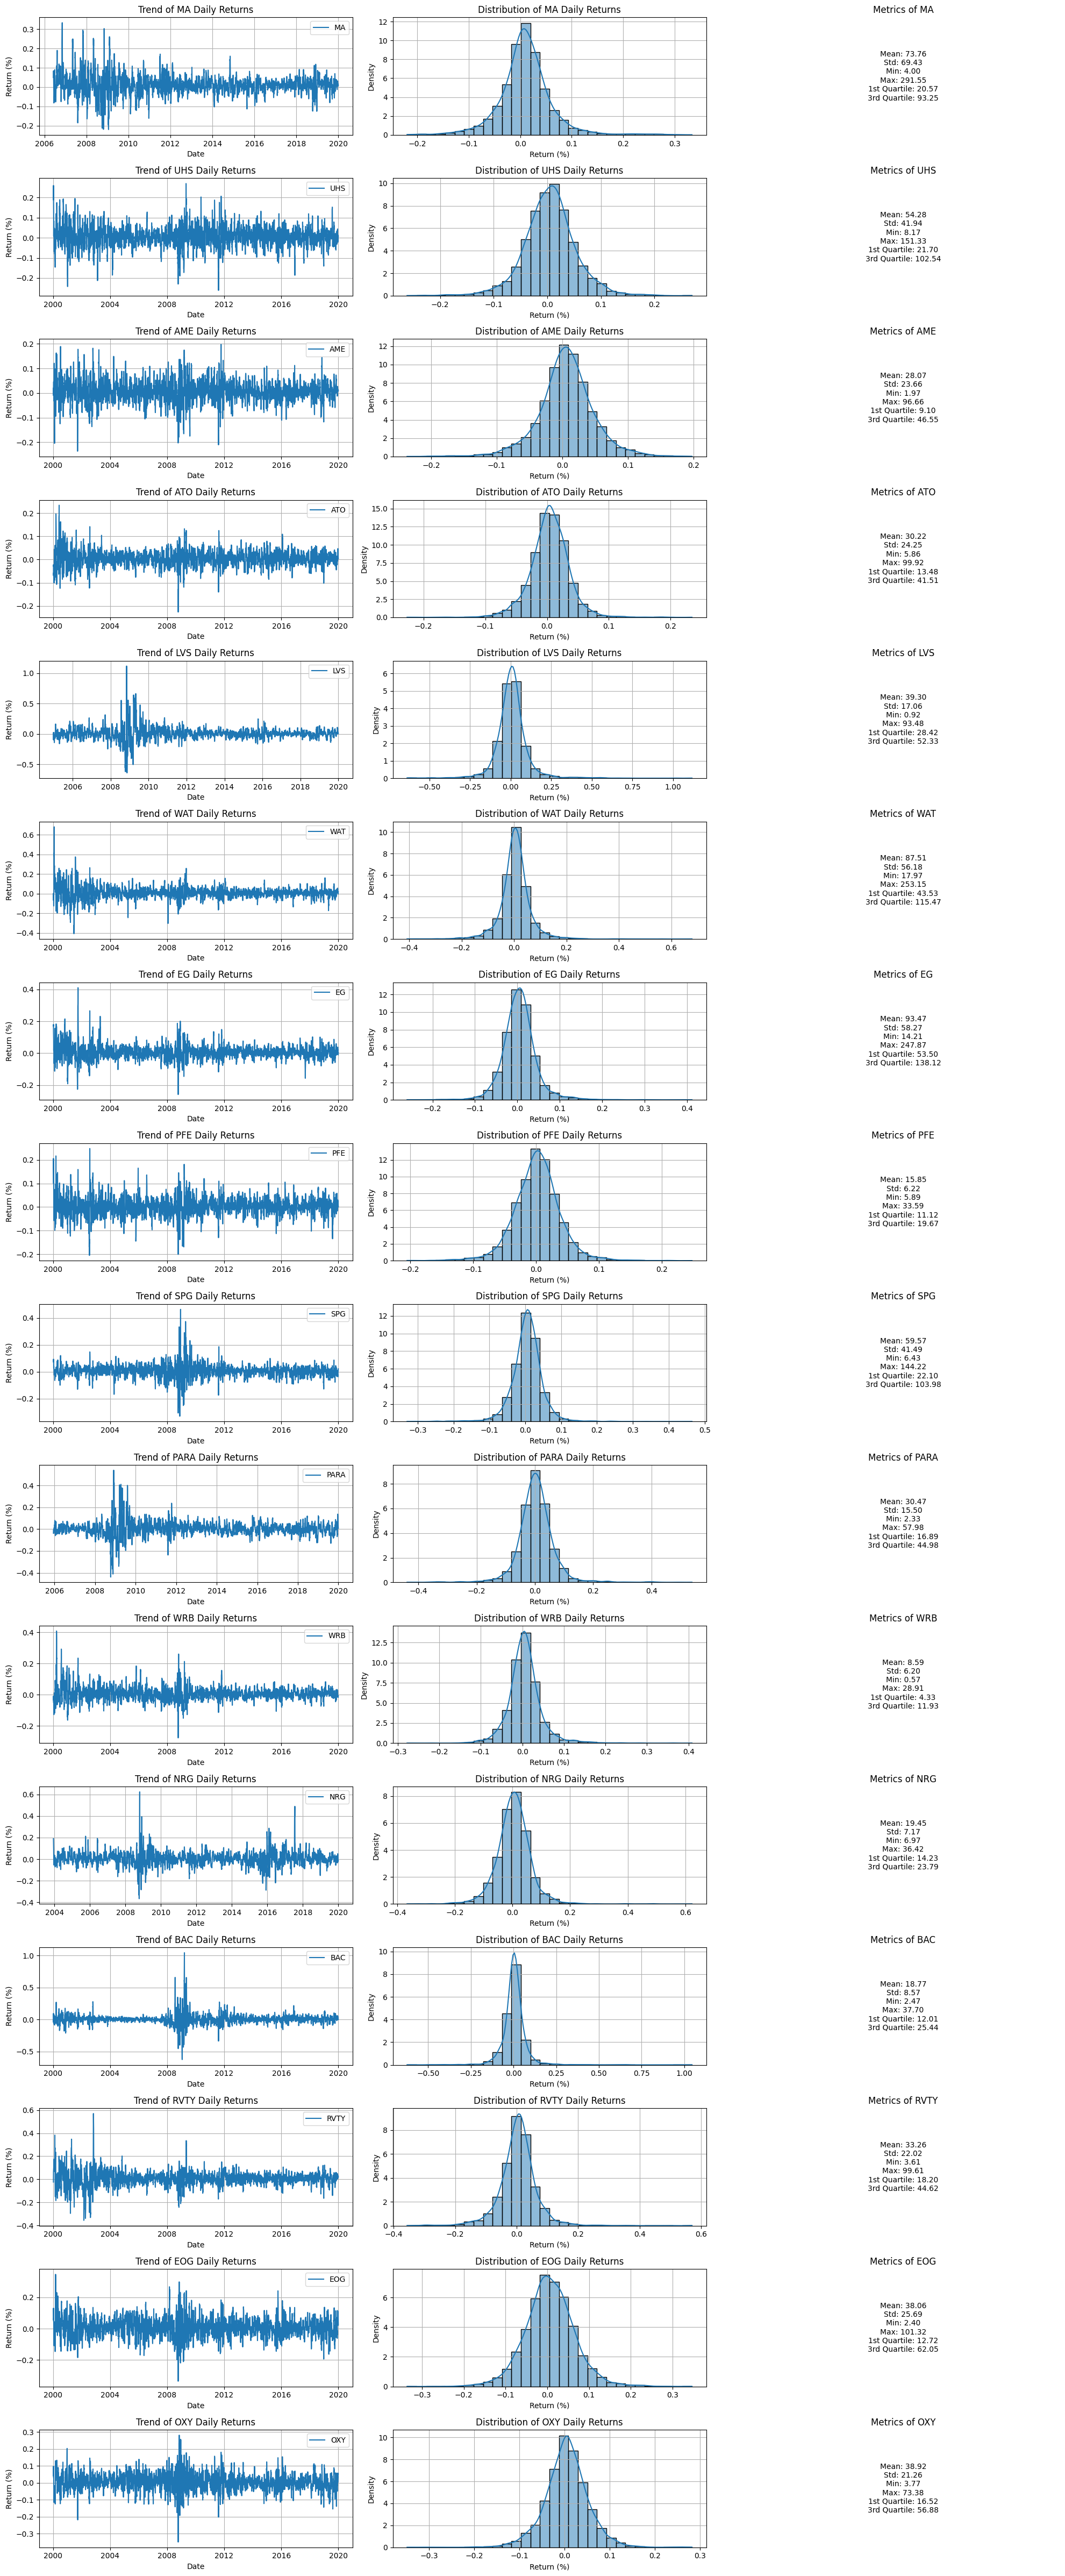

In [8]:
portfolio.analyze_securities()

Awesome we can proceed.

Now, lets observe the expected returns and associated risk if we were to invest solely in a single asset for all the chosen assets. They are going to provide insight into how diversifications (introduced later) pays out. 

In [9]:
portfolio.data_extractor.single_security_returns()

Security: MA
Mean expected return: 0.009992736949374983
Risk: 0.05127118166697374


Security: UHS
Mean expected return: 0.005011353671367895
Risk: 0.049011067316284435


Security: AME
Mean expected return: 0.006079603997211547
Risk: 0.04231776879975992


Security: ATO
Mean expected return: 0.0040398661576724155
Risk: 0.032084298826260294


Security: LVS
Mean expected return: 0.00659128729042044
Risk: 0.10153272717153189


Security: WAT
Mean expected return: 0.004902046241719423
Risk: 0.06000475551428018


Security: EG
Mean expected return: 0.0046877122727619945
Risk: 0.04146677802658508


Security: PFE
Mean expected return: 0.0018769036129750048
Risk: 0.037117673731572084


Security: SPG
Mean expected return: 0.004861725164136975
Risk: 0.04395384465918285


Security: PARA
Mean expected return: 0.003608498506016724
Risk: 0.06423546244251865


Security: WRB
Mean expected return: 0.005798222131618186
Risk: 0.04126049878161364


Security: NRG
Mean expected return: 0.004354946534820464
Risk

/Users/javierdominguezsegura/Academics/College/Courses/2nd year/Lin Algebra/library/plots/plots.py:132: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


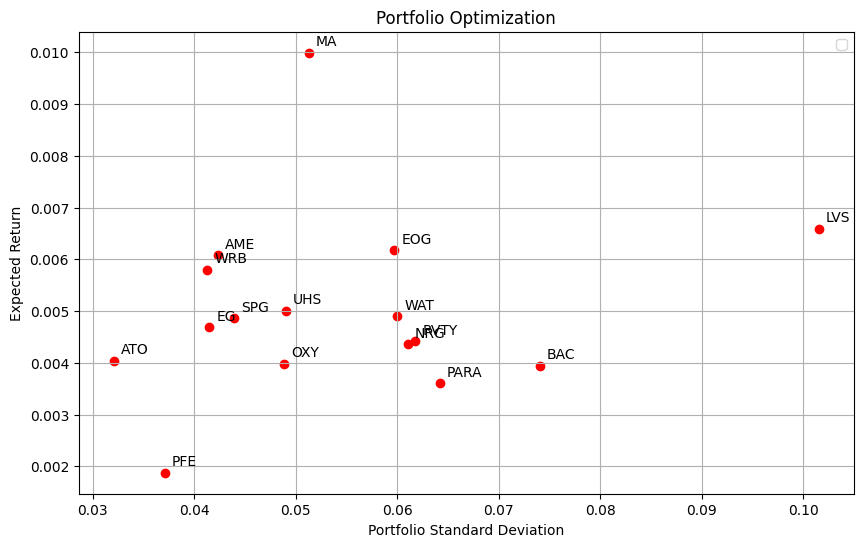

In [10]:
portfolio.plots.plot_results(include_individual_securities=True)

<hr>

## 1) Extracting matrices 
Now that we are confident that the CER assumption is not violated by any of the chosen assets, we will proceed to extract the neccesary matrices that are needed for the different portfolio computations. We will also describe our suggestion to use eigenvalues for the correlation matrix noise reduction.

In [11]:
portfolio.data_extractor.compute_matrices()

Lets observe the results by accessing the attributes of the corresponding class

In [12]:
portfolio.data_extractor.SIGMA

array([[0.0026295 , 0.00071073, 0.00085455, 0.00037736, 0.00185001,
        0.00070141, 0.00046307, 0.00040337, 0.00088531, 0.00123689,
        0.00033971, 0.00088922, 0.00124166, 0.00079738, 0.00089889,
        0.00075584],
       [0.00071073, 0.00240256, 0.00057803, 0.00031131, 0.00169515,
        0.00060614, 0.00047889, 0.0004825 , 0.00062017, 0.00121088,
        0.00046031, 0.00069259, 0.00085746, 0.00056459, 0.00067624,
        0.00071148],
       [0.00085455, 0.00057803, 0.00179115, 0.000436  , 0.00166816,
        0.00073842, 0.00061165, 0.00046838, 0.00068911, 0.00114511,
        0.0005962 , 0.00078758, 0.00116888, 0.00093585, 0.00101254,
        0.00088854],
       [0.00037736, 0.00031131, 0.000436  , 0.00102961, 0.00087116,
        0.00040905, 0.00043474, 0.00029357, 0.00052246, 0.00071741,
        0.00039453, 0.0005556 , 0.00055513, 0.00043636, 0.00053312,
        0.00053015],
       [0.00185001, 0.00169515, 0.00166816, 0.00087116, 0.01031162,
        0.00182657, 0.00094748, 

In [13]:
portfolio.data_extractor.SIGMA_INV

array([[ 5.23686909e+02, -6.05298564e+01, -1.19973879e+02,
        -6.95798395e+00, -1.22839575e+01, -1.50397234e+01,
        -2.26134383e+01,  1.06651701e+01, -1.16684463e+02,
         1.38047634e+01,  5.33132356e+01, -3.64117476e+01,
        -3.55243474e+01, -1.90423180e+01, -3.41329817e+01,
         1.38385341e+00],
       [-6.05298564e+01,  5.32986231e+02, -2.27635851e+01,
         2.64740990e+00, -3.69710083e+01, -1.11543208e+01,
        -3.48969538e+01, -7.15441742e+01,  3.99043272e+01,
        -9.50573895e+01, -3.80407283e+01, -1.92307020e+01,
         3.42175644e+01, -6.73030749e-01,  1.89748182e+01,
        -3.53088101e+01],
       [-1.19973879e+02, -2.27635851e+01,  9.00354647e+02,
        -7.04224915e+01, -2.07435336e+01, -1.28920994e+01,
        -7.83370331e+01, -3.72814482e+01, -2.16126547e+01,
        -5.15239299e+00, -8.87298277e+01, -1.85625126e+01,
        -3.89064424e+01, -9.44586456e+01, -5.75401278e+01,
        -8.59083258e+01],
       [-6.95798395e+00,  2.64740990e

In [14]:
portfolio.data_extractor.MU

array([[0.00999274],
       [0.00501135],
       [0.0060796 ],
       [0.00403987],
       [0.00659129],
       [0.00490205],
       [0.00468771],
       [0.0018769 ],
       [0.00486173],
       [0.0036085 ],
       [0.00579822],
       [0.00435495],
       [0.003948  ],
       [0.00442011],
       [0.00618246],
       [0.00398618]])

In [15]:
portfolio.data_extractor.ONE_VECTOR

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

As anticipated we want to smooth out noise from our correlation matrix (which is more noised as the number of assets in our portfolio increase), thus we can cleverly apply PCA to the Sigma matrix. This will significanlty improve the robustness of our model which is critical in this task. This is accomplished by making the model less sensitive to estimation errors in the original Sigma.

In [16]:
portfolio.data_extractor.pca_shrinkage(var_threshold=0.90)

(array([[0.00262392, 0.0007083 , 0.0008878 , 0.00038547, 0.00185082,
         0.00070199, 0.00045008, 0.00041111, 0.00086983, 0.00124287,
         0.00033638, 0.00088872, 0.00123988, 0.00079169, 0.00088982,
         0.00075871],
        [0.0007083 , 0.00240336, 0.0005783 , 0.0003101 , 0.00169444,
         0.00060537, 0.00047866, 0.00049195, 0.00063267, 0.0012015 ,
         0.00045411, 0.00069253, 0.00085912, 0.00056511, 0.00067651,
         0.00071445],
        [0.0008878 , 0.0005783 , 0.00165043, 0.00042471, 0.00167066,
         0.00073139, 0.00064919, 0.00047111, 0.00069882, 0.00114484,
         0.00062103, 0.00078913, 0.00116926, 0.00095822, 0.0010418 ,
         0.00087553],
        [0.00038547, 0.0003101 , 0.00042471, 0.00112619, 0.00087718,
         0.00040731, 0.00041763, 0.00029428, 0.00046485, 0.00073847,
         0.00039946, 0.00055149, 0.00055495, 0.00043172, 0.00054159,
         0.00050246],
        [0.00185082, 0.00169444, 0.00167066, 0.00087718, 0.01031264,
         0.0018

In [17]:
# Lets update the class with the new computed data
portfolio.update_data()

# 2) Global Minimum Variance Portfolio
A baseline for our modelling in the risk-return space. It provides the minimum amount of risk that can obtained in our portfolio. The specific return is not of interest here, but rather the minimization of the risk (i.e: variance). By definition there should not be any portfolio that can have less risk than this portfolio, consequently, the global minimum variance portfolio will be in the efficient frontier. It will represent the borderpoint between the efficient and the inefficient frontier.

In [18]:
results_dict = portfolio.compute_global_minimum_variance_portfolio()

In [19]:
results_dict["weights"], results_dict["weights"].sum()

(array([[ 0.06296693],
        [ 0.10062575],
        [ 0.07097963],
        [ 0.2859117 ],
        [-0.07064968],
        [ 0.02619061],
        [ 0.04650638],
        [ 0.23181185],
        [ 0.17177939],
        [-0.11890681],
        [ 0.10072569],
        [ 0.01447547],
        [-0.00157373],
        [ 0.03464209],
        [-0.00593323],
        [ 0.05044797]]),
 np.float64(1.0))

In [20]:
results_dict["expected_return"], results_dict["expected_variance"]

(0.004400329046654161, 0.0005204256495887014)

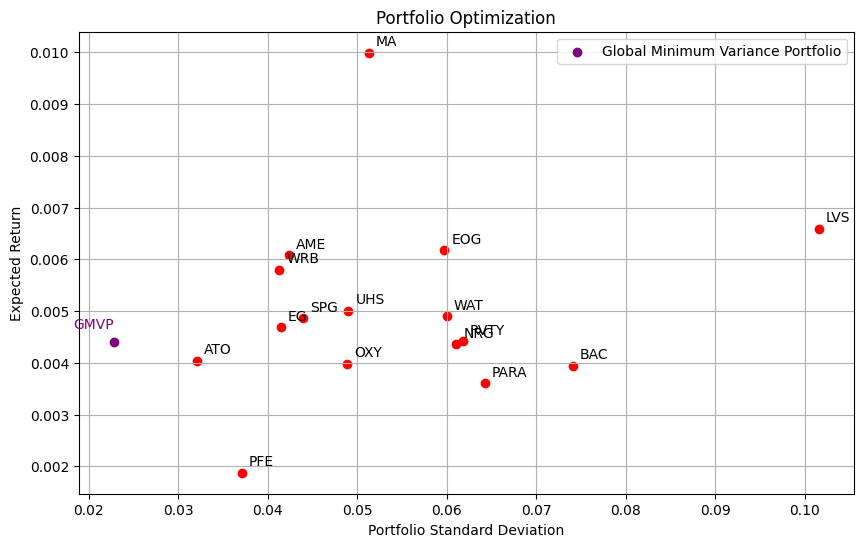

In [21]:
portfolio.plots.plot_results(include_individual_securities=True, include_gmvp=True)

# 3) Efficient Portfolios
The efficient frontier refers to the portfolios that solve the duality problem. That is, the combination of the primal (specify risk, maximize return) + dual problem (specify return, minimize risk). Each point in the efficient frontier is a discrete portfolio (combination of investment weights) representing the highest return for the given risk or the minimum risk for the given return.

In [22]:
df = portfolio.compute_efficient_frontier()
df

,weights,variance,sigma,expected_return
0,"[[-0.166965238177728], [0.08811843892637264], ...",0.000741,0.027219,0.001877
1,"[[-0.1594954689998261], [0.08852476179791746],...",0.000727,0.026959,0.001959
2,"[[-0.1520256998219242], [0.08893108466946224],...",0.000713,0.026705,0.002041
3,"[[-0.14455593064402228], [0.08933740754100704]...",0.000700,0.026457,0.002123
4,"[[-0.13708616146612043], [0.08974373041255186]...",0.000687,0.026216,0.002205
...,...,...,...,...
95,"[[0.5426628337229525], [0.12671911172312725], ...",0.001480,0.038468,0.009665
96,"[[0.5501326029008548], [0.1271254345946719], [...",0.001510,0.038858,0.009747
97,"[[0.5576023720787564], [0.12753175746621678], ...",0.001540,0.039249,0.009829
98,"[[0.5650721412566585], [0.12793808033776155], ...",0.001572,0.039643,0.009911


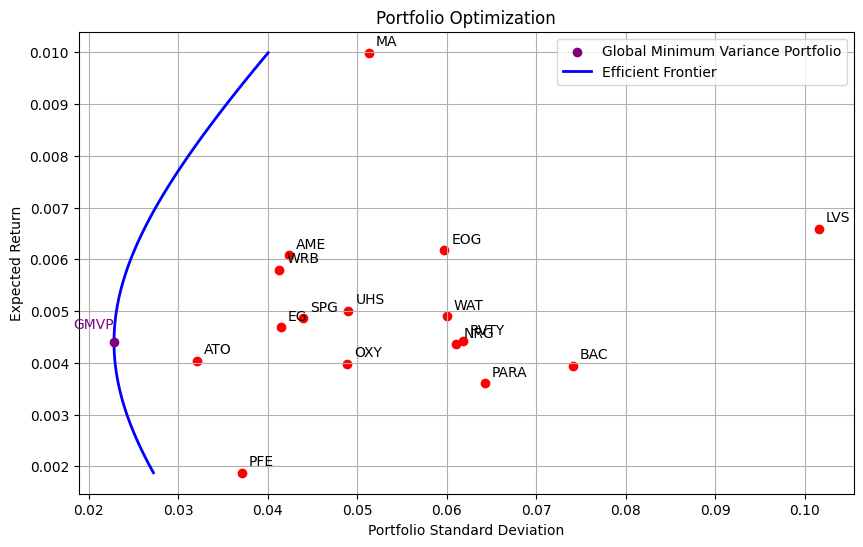

In [23]:
portfolio.plots.plot_results(include_gmvp=True, include_efficient_frontier=True, include_individual_securities=True)

We see that the maximum possible return is conditioned by the maximum highest individual return. The inverse (for the minimum), also applies. 

# 4) Capital Asset Pricing Model
Finally, we introduce the possibility to invest into a risk-free asset (e.g. Treasury Bill). We first select the expected daily return rate of the risk-free asset. We then select an alpha (i.e: weight determining how much to invest in the risk-free asset and the risky-assets portfolio) that maximizes the sharpe ratio (i.e: the excess return rate per unit of risk). The linearity of the alpha-parametrized equation gives name to the capital allocation line CAL (also referred as capital market line)

In [24]:
annual_risk_free_rate = 0.02
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/252) - 1 # Formula (assuming 252 days of trading)
daily_risk_free_rate

7.85849419846496e-05

In [25]:
results_dict = portfolio.compute_sharpe_portfolio(daily_risk_free_rate)

In [26]:
results_dict["weights"]

array([[ 0.37994524],
       [ 0.11786798],
       [ 0.14694438],
       [ 0.20513043],
       [-0.04863301],
       [ 0.05630072],
       [ 0.04625173],
       [-0.13155628],
       [ 0.18141025],
       [-0.17542582],
       [ 0.27276124],
       [-0.02079322],
       [-0.03277313],
       [-0.00452867],
       [ 0.10266536],
       [-0.0955672 ]])

In [27]:
results_dict["expected_return"]

0.007879055568947255

In [28]:
results_dict["expected_variance"]

0.0009393348830506565

In [29]:
print(f'Daily Sharpe ratio: {results_dict["sharpe_ratio"]} \nAnnualized Sharpe ratio: {results_dict["sharpe_ratio"] * np.sqrt(252)}')

Daily Sharpe ratio: 0.25451335774731826 
Annualized Sharpe ratio: 4.040274299660511


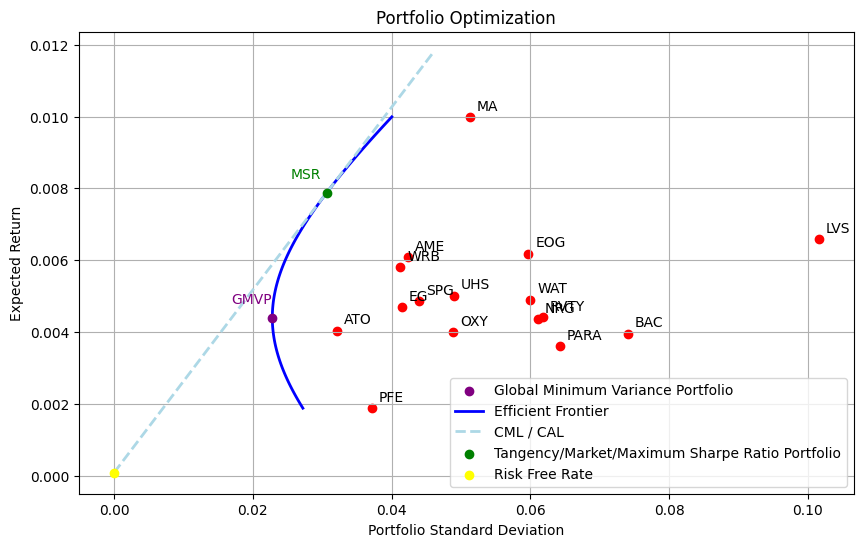

In [30]:
portfolio.plots.plot_results(include_gmvp=True, include_efficient_frontier=True, include_sharpe=True, include_individual_securities=True)

It must be noted that MSR is simply a given portfolio in the efficient frontier that maximizes the sharpe ratio. The specific MSR point in the return-risk space symbolizes what occurs when you invest completely in the risky-assets portfolio (i.e: alpha = 1). If you invest all of your capital into the risk-free-asset (i.e: alpha = 0), naturally, you would have for your portfolio the distribution of the risk free rate. It is between those edges that you have the different returns/risk if invested at most all your capital. If you exceed the MSR in the CAL you would now be borrowing money in order to finance the excess of capital investment (leveraging). We assume the rate at which you borrow this money is the same of the risk-free asset rate.